In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
customer = pd.read_csv(r"C:\Data Science Files\Case Study 1 - Retail Case Study\Customer.csv")
prodinfo = pd.read_csv(r"C:\Data Science Files\Case Study 1 - Retail Case Study\prod_cat_info.csv")
transaction = pd.read_csv(r"C:\Data Science Files\Case Study 1 - Retail Case Study\Transactions.csv")

In [6]:
customer.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [7]:
prodinfo.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [8]:
transaction.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [3]:
prodinfo.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)


#### Merging the dataset Customer,Product Hierarchy and Transactions 

In [4]:
prod_concat = pd.merge(left=transaction, right=prodinfo,on=["prod_cat_code","prod_subcat_code"],how="left")

In [5]:
customer_final = pd.merge(left=prod_concat, right=customer,right_on="customer_Id", left_on="cust_id", how="left")

In [6]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0


In [6]:
customer_final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

In [8]:
customer_final["tran_date"] = customer_final["tran_date"].str.replace("/","-")

In [9]:
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"],format="%d-%m-%Y")

In [10]:
customer_final["tran_date"].head(10)

0   2014-02-28
1   2014-02-27
2   2014-02-24
3   2014-02-24
4   2014-02-23
5   2014-02-23
6   2014-02-22
7   2014-02-22
8   2014-02-22
9   2014-02-21
Name: tran_date, dtype: datetime64[ns]

In [11]:
customer_final.duplicated().sum()

13

In [12]:
customer_final.drop_duplicates(inplace=True)

In [13]:
customer_final.duplicated().sum()

0

### 2 Preparing a Summary report

###### column name and their crossponding data types

In [14]:
customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [15]:
customer_final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                         object
Gender                      object
city_code                  float64
dtype: object

###### Top/Bottom 10 observation

In [16]:
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,09-10-1982,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,29-05-1981,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,21-04-1971,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,04-11-1971,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,27-11-1979,F,3.0


In [17]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,10-08-1976,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,12-10-1991,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,17-01-1980,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,28-06-1975,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,18-04-1974,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,15-01-1982,M,1.0


##### Five number summary

In [18]:
customer_final.describe()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.304000e+04,23040.000000,23040,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23032.000000
mean,5.006955e+10,271021.880252,2012-08-09 05:59:11.250000128,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,271021.880252,5.483067
min,3.268991e+06,266783.000000,2011-01-25 00:00:00,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493315e+10,268935.000000,2011-11-02 18:00:00,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009188e+10,270980.500000,2012-08-11 00:00:00,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,270980.500000,5.000000
75%,7.532632e+10,273114.250000,2013-05-17 00:00:00,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,273114.250000,8.000000
max,9.998755e+10,275265.000000,2014-02-28 00:00:00,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000
std,2.898062e+10,2431.573668,NaN,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,2431.573668,2.863331


###### Frequancy Tables for categorical variables

In [19]:
customer_final.loc[:,customer_final.dtypes=="object"].describe()

,Store_type,prod_cat,prod_subcat,DOB,Gender
count,23040,23040,23040,23040,23031
unique,4,6,18,3987,2
top,e-Shop,Books,Women,17-09-1982,M
freq,9304,6066,3046,32,11804


### (3) Generate histograms for all continuous variables and frequency bars for categorical variables
###### Histogram of all continuous variables

In [20]:
continuous_customer = customer_final.loc[:,['prod_subcat_code','prod_cat_code','Qty','Rate','Tax','total_amt']]
continuous_customer.columns

Index(['prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt'], dtype='object')

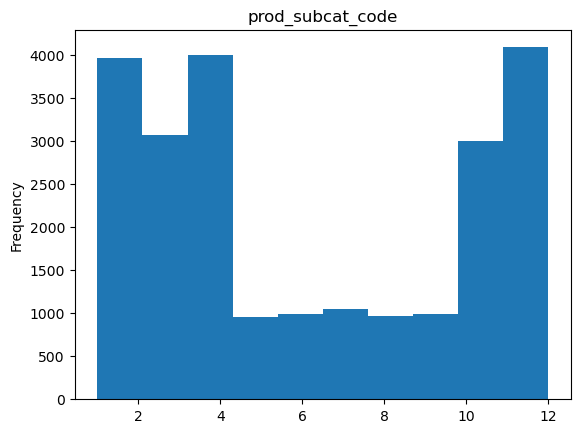

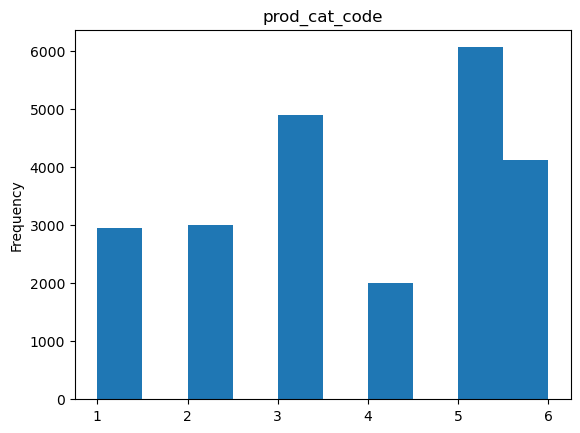

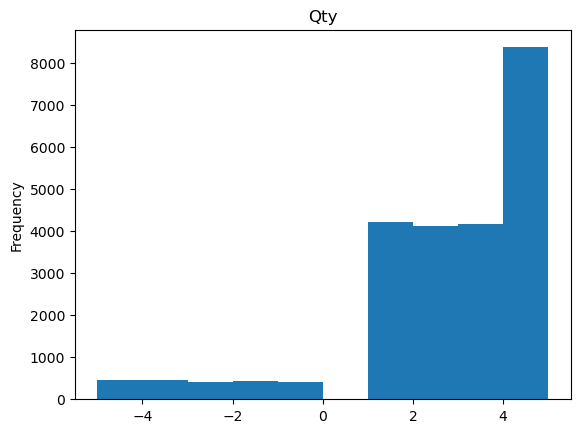

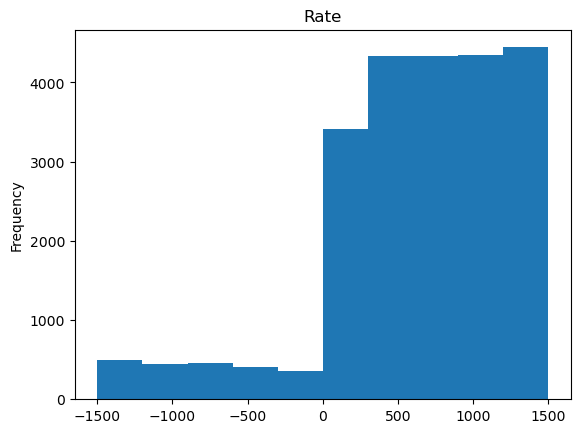

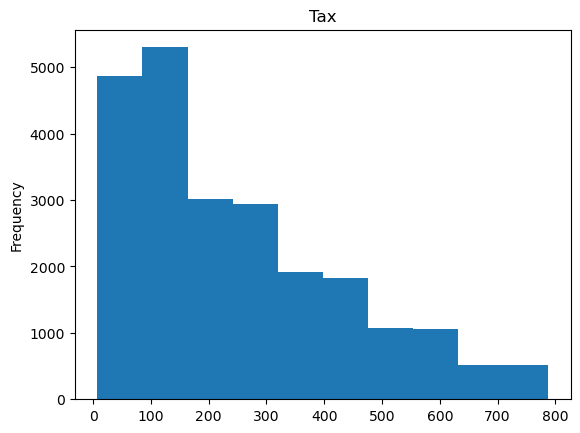

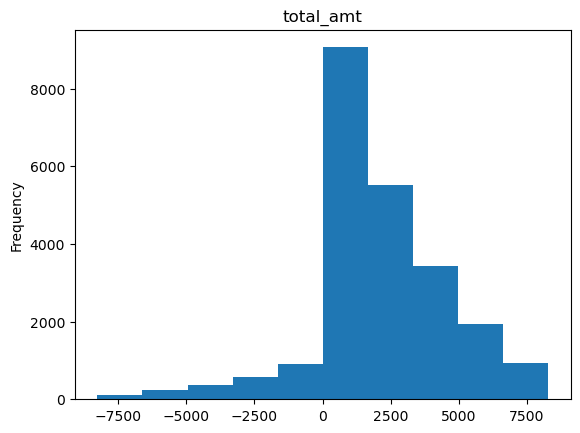

In [21]:
for i in continuous_customer.columns:
    continuous_customer[i].plot(kind='hist')
    plt.title(i)
    plt.show()

##### Bar chart of categorical variables

In [22]:
categorical_customer = customer_final.loc[:,customer_final.dtypes=='object']

In [23]:
categorical_customer.dtypes

Store_type     object
prod_cat       object
prod_subcat    object
DOB            object
Gender         object
dtype: object

In [24]:
print(categorical_customer['Gender'].unique())


['M' 'F' nan]


In [25]:
categorical_customer = categorical_customer.dropna(subset=['Gender'])

In [26]:
print(categorical_customer['Gender'].unique())

['M' 'F']


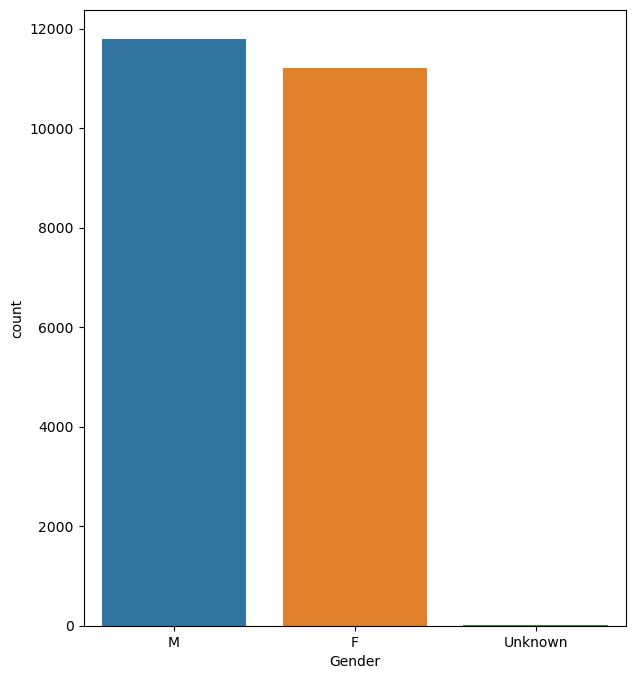

In [45]:
plt.figure(figsize=(7, 8))
sns.countplot(data=categorical_customer, x='Gender')
plt.show()

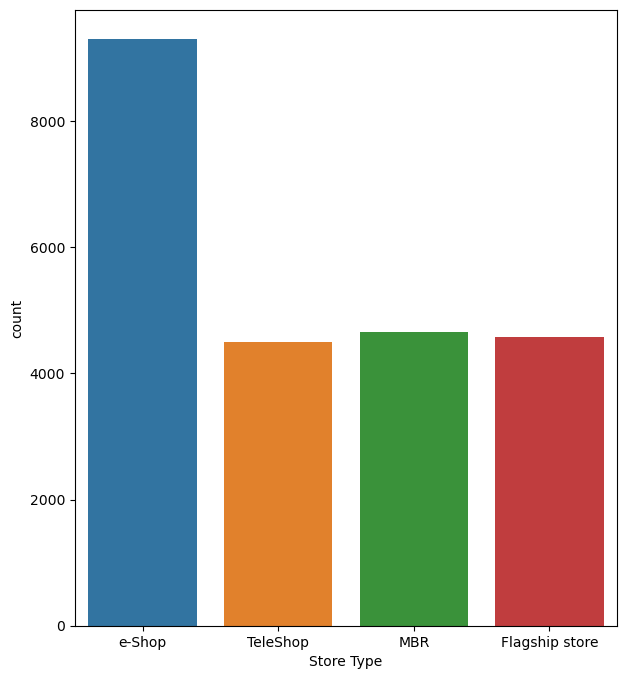

In [27]:
plt.figure(figsize=(7,8))
sns.countplot(data=categorical_customer,x='Store_type')
plt.xlabel('Store Type')
plt.show()

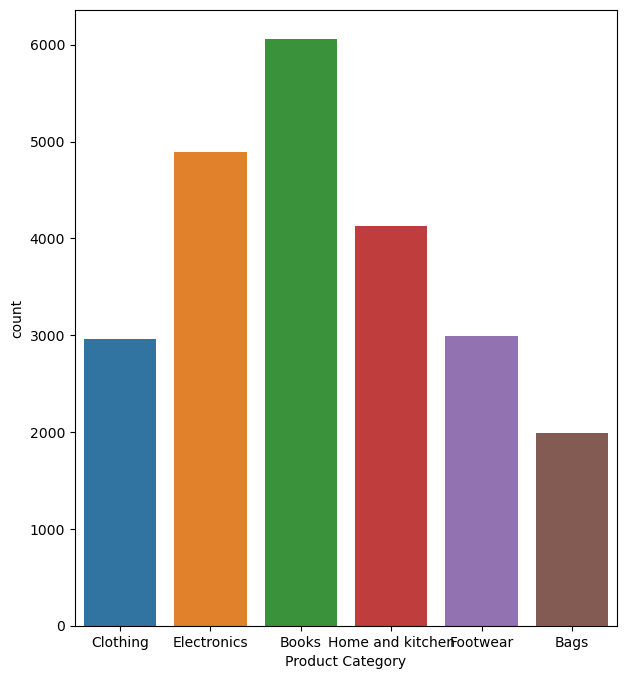

In [48]:
plt.figure(figsize=(7,8))
sns.countplot(data = categorical_customer, x='prod_cat')
plt.xlabel('Product Category')
plt.show()

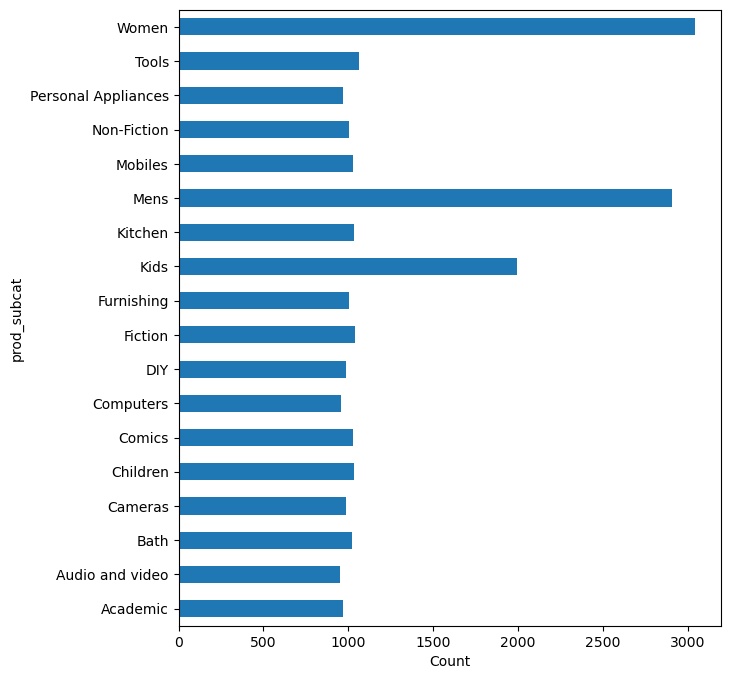

In [28]:
plt.figure(figsize=(7,8))
categorical_customer.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('prod_subcat')
plt.show()

### (4) Calculate the following information using the merged dataset:
###### (a) Time period of the available transaction data

In [29]:
customer_final = customer_final.dropna(subset=['tran_date'])

In [30]:
customer_final.sort_values(by='tran_date')

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,15-01-1982,M,1.0
23033,32887353269,268885,2011-01-25,3,1,1,276,28.980,304.980,Flagship store,Clothing,Kids,268885,14-04-1989,F,6.0
23034,28972634039,275227,2011-01-25,9,3,1,334,35.070,369.070,MBR,Electronics,Cameras,275227,23-09-1989,M,4.0
23035,42161597232,267094,2011-01-25,3,1,3,147,46.305,487.305,MBR,Clothing,Kids,267094,24-11-1992,M,9.0
23036,46821751538,269160,2011-01-25,10,5,5,941,494.025,5199.025,TeleShop,Books,Non-Fiction,269160,24-01-1972,F,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0


In [31]:
min_date = customer_final['tran_date'].min()

In [32]:
max_date = customer_final['tran_date'].max()

In [33]:
print("Time period of the available transaction data is from "+ pd.Timestamp.strftime(min_date,format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

Time period of the available transaction data is from 25-01-2011 to 28-02-2014


###### (b) Count of transactions where the total amount of transaction was negative

In [34]:
neg_tran = customer_final.loc[customer_final['total_amt']<0,'transaction_id'].count()

In [35]:
print("Count of transactions where the total amount of transaction was negative is",neg_tran,".")

Count of transactions where the total amount of transaction was negative is 2164 .


### (5) Analyze which product categories are more popular among females vs male customers

In [36]:
prod_gender = customer_final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()

In [37]:
prod_gender.pivot(index='Gender',columns='prod_cat',values='Qty')

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


### (6) Which City code has the maximum customers and what was the percentage of customers from that city?

In [38]:
customer_city = customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending = False)
customer_city

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: customer_Id, dtype: int64

In [39]:
percentage_cust_city = round((customer_city[4.0] / customer_city.sum()) * 100,2)
percentage_cust_city

10.52

### (7) Which store type sells the maximum products by value and by quantity?

In [41]:
max_prod_by_val_qty = customer_final.groupby("Store_type")[["Qty","Rate"]].sum().sort_values(by="Qty",ascending=False)
max_prod_by_val_qty.head(1)

,Qty,Rate
Store_type,,
e-Shop,22790,5945770


### (8) What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [42]:
amt_earn = customer_final.pivot_table(index='prod_cat',columns = 'Store_type', values = 'total_amt', aggfunc='sum')
amt_earn

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.835,848678.675,789181.055,1617933.265
Books,2493677.810,2496039.195,2545714.470,5297161.155
Clothing,1194423.230,1287686.335,1241834.360,2527193.565
Electronics,2215136.040,2107969.825,1978457.195,4429142.770
Footwear,1234806.560,1112163.715,1235719.290,2643215.250
Home and kitchen,1713004.150,1822403.570,1581227.375,3327977.120


In [43]:
amt_earn.loc[["Clothing","Electronics"],"Flagship store"]

prod_cat
Clothing       1194423.23
Electronics    2215136.04
Name: Flagship store, dtype: float64

In [44]:
amt_earn.loc[["Clothing","Electronics"],"Flagship store"].sum()

3409559.27

### (9) What was the total amount earned from "Male" customers under the "Electronics" category?

In [45]:
amt_earn = customer_final.pivot_table(index='prod_cat',columns='Gender',values='total_amt',aggfunc='sum')
amt_earn

Gender,F,M
prod_cat,,
Bags,2079618.840,2046722.990
Books,6174590.825,6645972.775
Clothing,3026750.805,3224079.495
Electronics,5019354.210,5711351.620
Footwear,3203155.215,3020200.365
Home and kitchen,4133702.235,4305169.505


In [46]:
male_earning = amt_earn.loc['Electronics','M']
male_earning

5711351.62

### (10) How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [47]:
tran_positive = customer_final.loc[customer_final['total_amt']>0,:]
tran_positive.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,13-10-1986,M,1.0


In [48]:
uniq_tran = tran_positive.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
uniq_tran

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [49]:
uniq_tran_count = uniq_tran.groupby('customer_Id')['transaction_id'].count().reset_index()
uniq_tran_count

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8
...,...,...
5501,275257,4
5502,275261,3
5503,275262,2
5504,275264,2


In [50]:
uniq_tran_count[uniq_tran_count['transaction_id']>10]

,customer_Id,transaction_id


### (11) For all customers aged between 25-35, find out:
###### (a) What was the total amount spent for 'Electronics' and 'Books' product categories?

In [51]:
now = pd.Timestamp('now')



In [55]:
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"],format="%d-%m-%Y")

In [56]:
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'], format='%m%d%y')

In [57]:
customer_final['DOB'] = customer_final['DOB'].where(customer_final['DOB'] < now,customer_final['DOB'] - pd.DateOffset(years=100))

In [58]:
customer_final['age'] = (now - customer_final['DOB']).dt.days / 365.25
customer_final['age'] = customer_final['age'].astype(int)

In [59]:
customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,age
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,43
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,51
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,32
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,43
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0,52
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0,40
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0,48
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0,54


In [60]:
customer_final['age_cat'] = pd.cut(customer_final['age'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)
customer_final.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,age,age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,43,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,51,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,32,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,43,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,32,25-35


In [61]:
cust_bw_25_35 = customer_final.groupby(['age_cat', 'prod_cat'], observed=True)['total_amt'].sum()

In [62]:
cust_bw_25_35.loc['25-35',['Books','Electronics']]

age_cat  prod_cat   
25-35    Books          2048432.425
         Electronics    1752048.220
Name: total_amt, dtype: float64

### (b) What was the total amount spent by these customers between 1st Jan 2014 to 1st Mar 2014?

In [63]:
total_amt_25_35_customer = customer_final[customer_final['age_cat']=='25-35']
total_amt_25_35_customer.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,age,age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,32,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,32,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,35,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,268444,1992-01-02,F,6.0,33,25-35
37,31384765864,267058,2014-02-19,3,2,1,793,83.265,876.265,e-Shop,Footwear,Women,267058,1992-02-06,F,10.0,33,25-35


In [64]:
total_amount = total_amt_25_35_customer[(total_amt_25_35_customer['tran_date'] >='2014-01-01')&(total_amt_25_35_customer['tran_date'] <='2014-03-01')]
total_amount

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,age,age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,32,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,32,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,35,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,268444,1992-01-02,F,6.0,33,25-35
37,31384765864,267058,2014-02-19,3,2,1,793,83.265,876.265,e-Shop,Footwear,Women,267058,1992-02-06,F,10.0,33,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,28696753858,270695,2014-01-01,11,5,1,704,73.920,777.920,TeleShop,Books,Children,270695,1992-12-05,F,6.0,32,25-35
1051,32889219128,269536,2014-01-01,10,5,5,1423,747.075,7862.075,e-Shop,Books,Non-Fiction,269536,1990-03-21,M,5.0,34,25-35
1054,42711619809,271701,2014-01-01,1,2,5,336,176.400,1856.400,MBR,Footwear,Mens,271701,1991-07-11,M,7.0,33,25-35
1059,67088172893,271877,2014-01-01,1,1,1,902,94.710,996.710,e-Shop,Clothing,Women,271877,1992-03-28,F,6.0,32,25-35


In [65]:
total_amount['total_amt'].sum()

417066.78

In [66]:
print('The total amount spent by customer aged bw 25-35 from 1st jan 2014 to 1st march 2014 is : ',total_amount['total_amt'].sum(),'.')

The total amount spent by customer aged bw 25-35 from 1st jan 2014 to 1st march 2014 is :  417066.78 .
